In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

np.random.seed(42)

%config InlineBackend.figure_format = 'retina'

In [7]:
df = pd.read_csv('NYC_crime.csv')

In [8]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,807539955,01/01/2016,12:00:00,01/24/2018,17:00:00,01/24/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,18,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,988085,217902,40.764774,-73.986157,"(40.764774473000045, -73.986157253)"
1,908438691,01/01/2016,10:00:00,02/11/2018,16:00:00,02/11/2018,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",...,24,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,993373,229301,40.796058,-73.967052,"(40.79605784000006, -73.96705230699997)"
2,713483285,01/01/2016,00:00:00,02/15/2018,19:30:00,02/16/2018,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",...,32,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1001374,238163,40.820370,-73.938133,"(40.82036969600006, -73.93813284599996)"
3,178447094,01/01/2016,08:00:00,03/18/2017,17:00:00,02/21/2018,109,GRAND LARCENY,420,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",...,34,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1001606,251324,40.856492,-73.937261,"(40.85649236300002, -73.93726057999999)"
4,911003056,01/01/2016,12:00:00,02/16/2018,12:00:00,02/28/2018,109,GRAND LARCENY,407,"LARCENY,GRAND BY DISHONEST EMP",...,20,INSIDE,OTHER,NaN,NaN,989731,222727,40.778017,-73.980211,"(40.77801697500007, -73.98021132399998)"
5,872986408,01/01/2016,00:01:00,12/31/2017,23:59:00,03/05/2018,233,SEX CRIMES,170,"SEXUAL MISCONDUCT,INTERCOURSE",...,33,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,1001936,245282,40.839908,-73.936084,"(40.83990820100007, -73.93608358699998)"
6,823238722,01/01/2016,12:00:00,NaN,NaN,10/09/2018,233,SEX CRIMES,175,"SEXUAL ABUSE 3,2",...,32,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,999358,236472,40.815732,-73.945420,"(40.81573205300003, -73.94542041099999)"
7,856491353,01/01/2016,00:01:00,12/31/2016,23:59:00,10/14/2018,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",...,1,INSIDE,CLOTHING/BOUTIQUE,NaN,NaN,981219,196746,40.706707,-74.010934,"(40.70670677700008, -74.01093370399997)"
8,429976719,01/01/2016,08:00:00,05/31/2018,00:55:00,11/12/2018,233,SEX CRIMES,175,"SEXUAL ABUSE 3,2",...,28,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,997376,233927,40.808750,-73.952586,"(40.80874990400008, -73.95258580599993)"
9,415011862,01/01/2016,12:00:00,12/05/2018,12:00:00,12/18/2018,112,THEFT-FRAUD,739,"FRAUD,UNCLASSIFIED-FELONY",...,9,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,990563,203120,40.724200,-73.977226,"(40.72420015400007, -73.97722564299994)"


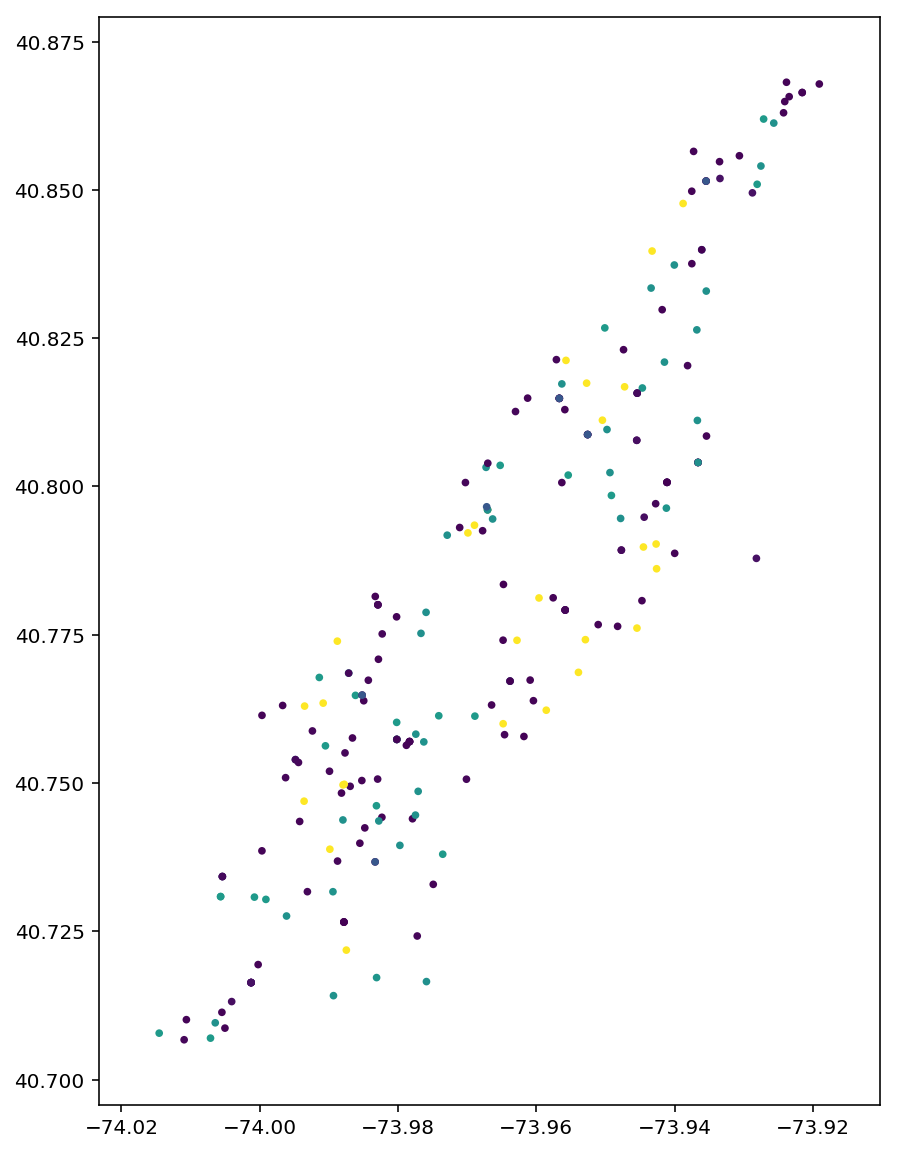

In [15]:
plt.figure(figsize = (7,10))
plt.scatter(df.Longitude, df.Latitude, s=8, c=(df.KY_CD))

In [19]:
ny = pd.read_excel('dv-complaint-radio-run-12-2018.xlsx')

In [21]:
ny =ny.iloc[5:]

In [22]:
ny.drop

,Unnamed: 0,Domestic Violence Report,Unnamed: 2,Unnamed: 3,Unnamed: 4
5,NaN,001,42,0,2
6,NaN,005,57,0,5
7,NaN,006,22,0,1
8,NaN,007,97,1,6
9,NaN,009,110,0,3
10,NaN,010,52,0,1
11,NaN,013,60,0,0
12,NaN,014,47,2,2
13,NaN,017,30,0,3
14,NaN,018,61,1,1


In [186]:
nypd

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,year,n_year,int_year
0,651421035,41.0,BRONX,11/28/2018,00:00:00,11/28/2018,00:01:00,COMPLETED,NaN,NaN,...,BLACK,M,NaN,NaN,NaN,NaN,NaN,2018,2018,2018
1,149013323,14.0,MANHATTAN,12/31/2018,23:40:00,12/31/2018,23:50:00,COMPLETED,NaN,NaN,...,WHITE,F,987866.0,214721.0,40.756044,-73.986950,"(40.75604353500006, -73.98694954399997)",2018,2018,2018
2,642981531,73.0,BROOKLYN,12/31/2018,23:30:00,12/31/2018,23:40:00,COMPLETED,NaN,NaN,...,WHITE HISPANIC,F,1006995.0,185258.0,40.675146,-73.918003,"(40.67514616200003, -73.91800323399997)",2018,2018,2018
3,429685363,67.0,BROOKLYN,12/31/2018,23:20:00,12/31/2018,23:30:00,COMPLETED,NaN,NaN,...,BLACK,F,999584.0,169903.0,40.633016,-73.944756,"(40.63301598000004, -73.94475559899996)",2018,2018,2018
4,290330841,5.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:20:00,COMPLETED,NaN,NaN,...,WHITE,M,986164.0,202140.0,40.721512,-73.993096,"(40.72151233500005, -73.99309646799998)",2018,2018,2018
5,304070477,46.0,BRONX,12/31/2018,23:15:00,12/31/2018,23:25:00,COMPLETED,NaN,NaN,...,BLACK,F,1009331.0,250025.0,40.852908,-73.909340,"(40.85290843100006, -73.90934005599996)",2018,2018,2018
6,751199176,52.0,BRONX,12/31/2018,23:15:00,NaN,NaN,COMPLETED,NaN,NaN,...,BLACK,M,1009562.0,254560.0,40.865355,-73.908488,"(40.865354981000046, -73.90848792599996)",2018,2018,2018
7,997073527,26.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:30:00,COMPLETED,GRANT,720.0,...,BLACK,F,995517.0,235873.0,40.814094,-73.959298,"(40.814093699000075, -73.95929788799998)",2018,2018,2018
8,984349032,43.0,BRONX,12/31/2018,23:08:00,NaN,NaN,COMPLETED,BRONXDALE,66563.0,...,BLACK,F,1020325.0,240688.0,40.827243,-73.869650,"(40.82724303400005, -73.86964982999997)",2018,2018,2018
9,140112001,49.0,BRONX,12/31/2018,23:00:00,12/31/2018,23:04:00,COMPLETED,NaN,NaN,...,UNKNOWN,E,1021171.0,252475.0,40.859591,-73.866528,"(40.85959137100008, -73.86652804699997)",2018,2018,2018


In [199]:
nypd = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')
nypd['year']=(nypd['RPT_DT'].str[-4:])

In [200]:
nypd.groupby('year').count().iloc[:,0]

year
2018    464065
Name: CMPLNT_NUM, dtype: int64

In [157]:
nypd['year'].unique()
nypd['year'].sort_values(ascending = True)

276396    1016
425484    1016
443772    1017
186634    1018
262073    1018
334874    1018
330786    1018
256481    1018
25526     1018
72751     1018
13177     1018
130909    1018
426820    1018
356884    1018
43006     1018
284394    1018
291261    1018
198929    1018
425483    1018
146221    1018
367010    1018
272415    1018
404580    1018
120118    1018
204437    1018
304297    1018
193297    1018
96331     1018
296548    1025
25525     1028
          ... 
155302    2018
155303    2018
155304    2018
155329    2018
155328    2018
155327    2018
155326    2018
155325    2018
155324    2018
155323    2018
155322    2018
155321    2018
155320    2018
155319    2018
155318    2018
155317    2018
155316    2018
155315    2018
155314    2018
155313    2018
155312    2018
155311    2018
155310    2018
155309    2018
155308    2018
155307    2018
155306    2018
155305    2018
155275    2018
232032    2018
Name: year, Length: 464065, dtype: object

In [165]:
nypd['year'].unique()

array(['2018', '2017', '2009', '1979', '2014', '1989', '2016', '2006',
       '2015', '2013', '2012', '2003', '1928', '2011', '2007', '1998',
       '2001', '2008', '2005', '2010', '2002', '1994', '1999', '1985',
       '1996', '1973', '1997', '1918', '1984', '2004', '1991', '1986',
       '1981', '1995', '1968', '1912', '2000', '1993', '1992', '1978',
       '1974', '1971', '1951', '1025', '1980', '1969', '1977', '1983',
       '1970', '1948', '1972', '1982', '1990'], dtype=object)

In [190]:
nypd['year']=nypd['year'].replace('1018','2018')
nypd['year']=nypd['year'].replace('1017','2017')
nypd['year']=nypd['year'].replace('1016','2016')
nypd['year']=nypd['year'].replace('1028','1928')
nypd['year']=nypd['year'].replace('1025','1925')
nypd['int_year'] = pd.to_numeric(nypd['year'])

In [191]:
cr18 = nypd['int_year']==2018
nypd[cr18]
cr15 = nypd['int_year']==2015
nypd[cr15]

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,year,int_year
5500,828790587,107.0,QUEENS,02/25/2015,12:00:00,08/13/2018,12:00:00,COMPLETED,NaN,NaN,...,45-64,WHITE,M,1031365.0,205427.0,40.730409,-73.830006,"(40.73040908400003, -73.83000578099995)",2015,2015
6668,759692047,34.0,MANHATTAN,09/08/2015,08:00:00,12/25/2018,19:00:00,COMPLETED,NaN,NaN,...,25-44,WHITE,F,1002114.0,250022.0,40.852918,-73.935428,"(40.85291774800004, -73.93542766099996)",2015,2015
8408,885765535,25.0,MANHATTAN,12/24/2015,00:01:00,12/24/2015,23:59:00,COMPLETED,NaN,NaN,...,UNKNOWN,UNKNOWN,F,1000555.0,230994.0,40.800694,-73.941109,"(40.800694331000045, -73.94110928599997)",2015,2015
8409,480323110,34.0,MANHATTAN,03/23/2015,00:00:00,08/14/2015,00:00:00,COMPLETED,NaN,NaN,...,45-64,BLACK HISPANIC,F,1003585.0,251292.0,40.856400,-73.930107,"(40.856400421000046, -73.93010671199994)",2015,2015
9518,188792375,75.0,BROOKLYN,10/15/2015,19:42:00,11/20/2018,19:53:00,COMPLETED,NaN,NaN,...,UNKNOWN,UNKNOWN,E,1019355.0,188601.0,40.684282,-73.873427,"(40.68428154800005, -73.87342672099999)",2015,2015
10681,171859852,14.0,MANHATTAN,03/06/2015,17:00:00,03/06/2015,22:00:00,COMPLETED,NaN,NaN,...,25-44,WHITE,M,985679.0,213954.0,40.753939,-73.994844,"(40.75393893800003, -73.99484365499995)",2015,2015
11931,654961634,50.0,BRONX,08/20/2015,00:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,45-64,WHITE HISPANIC,M,1010984.0,261034.0,40.883120,-73.903321,"(40.88311992000007, -73.90332096899994)",2015,2015
13171,318533658,44.0,BRONX,12/20/2015,13:32:00,12/20/2015,13:32:00,COMPLETED,NaN,NaN,...,<18,UNKNOWN,F,1006434.0,244344.0,40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",2015,2015
19082,851141541,32.0,MANHATTAN,12/15/2015,03:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,UNKNOWN,UNKNOWN,E,998940.0,234707.0,40.810888,-73.946934,"(40.81088832600005, -73.94693439099996)",2015,2015
19083,284109638,43.0,BRONX,12/13/2015,16:11:00,12/14/2018,01:00:00,COMPLETED,NaN,NaN,...,25-44,BLACK,F,1023345.0,245125.0,40.839408,-73.858712,"(40.83940845700005, -73.85871167099998)",2015,2015


In [ ]:
cr17 = nypd['int_year']==2017
nypd[cr17]

In [ ]:
cr16 = nypd['int_year']==2016
nypd[cr16]

In [192]:
cr18 = nypd['int_year']==2018
nypd[cr18]

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,year,int_year
0,651421035,41.0,BRONX,11/28/2018,00:00:00,11/28/2018,00:01:00,COMPLETED,NaN,NaN,...,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,2018,2018
1,149013323,14.0,MANHATTAN,12/31/2018,23:40:00,12/31/2018,23:50:00,COMPLETED,NaN,NaN,...,45-64,WHITE,F,987866.0,214721.0,40.756044,-73.986950,"(40.75604353500006, -73.98694954399997)",2018,2018
2,642981531,73.0,BROOKLYN,12/31/2018,23:30:00,12/31/2018,23:40:00,COMPLETED,NaN,NaN,...,18-24,WHITE HISPANIC,F,1006995.0,185258.0,40.675146,-73.918003,"(40.67514616200003, -73.91800323399997)",2018,2018
3,429685363,67.0,BROOKLYN,12/31/2018,23:20:00,12/31/2018,23:30:00,COMPLETED,NaN,NaN,...,25-44,BLACK,F,999584.0,169903.0,40.633016,-73.944756,"(40.63301598000004, -73.94475559899996)",2018,2018
4,290330841,5.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:20:00,COMPLETED,NaN,NaN,...,25-44,WHITE,M,986164.0,202140.0,40.721512,-73.993096,"(40.72151233500005, -73.99309646799998)",2018,2018
5,304070477,46.0,BRONX,12/31/2018,23:15:00,12/31/2018,23:25:00,COMPLETED,NaN,NaN,...,25-44,BLACK,F,1009331.0,250025.0,40.852908,-73.909340,"(40.85290843100006, -73.90934005599996)",2018,2018
6,751199176,52.0,BRONX,12/31/2018,23:15:00,NaN,NaN,COMPLETED,NaN,NaN,...,25-44,BLACK,M,1009562.0,254560.0,40.865355,-73.908488,"(40.865354981000046, -73.90848792599996)",2018,2018
7,997073527,26.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:30:00,COMPLETED,GRANT,720.0,...,25-44,BLACK,F,995517.0,235873.0,40.814094,-73.959298,"(40.814093699000075, -73.95929788799998)",2018,2018
8,984349032,43.0,BRONX,12/31/2018,23:08:00,NaN,NaN,COMPLETED,BRONXDALE,66563.0,...,25-44,BLACK,F,1020325.0,240688.0,40.827243,-73.869650,"(40.82724303400005, -73.86964982999997)",2018,2018
9,140112001,49.0,BRONX,12/31/2018,23:00:00,12/31/2018,23:04:00,COMPLETED,NaN,NaN,...,UNKNOWN,UNKNOWN,E,1021171.0,252475.0,40.859591,-73.866528,"(40.85959137100008, -73.86652804699997)",2018,2018


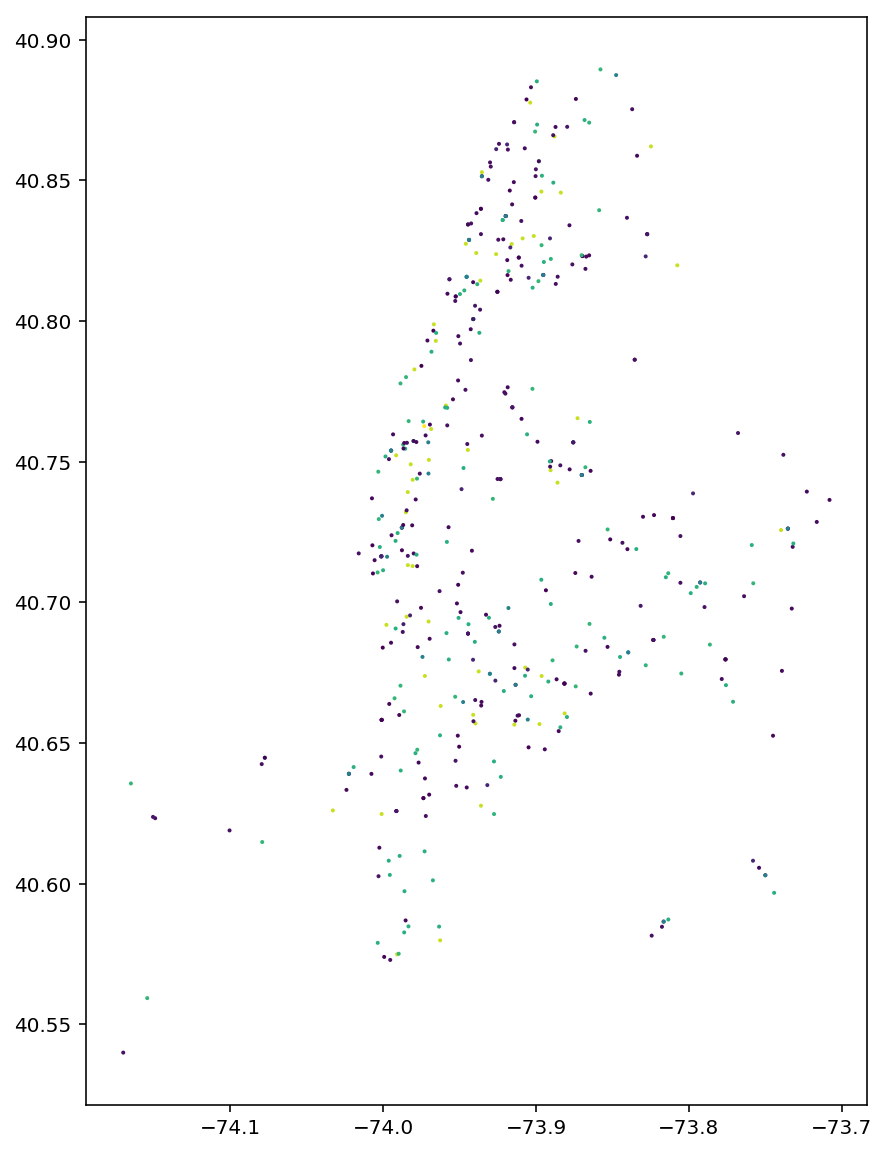

In [185]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr15].Longitude, nypd[cr15].Latitude, s=1, c=np.log(nypd[cr15].KY_CD))

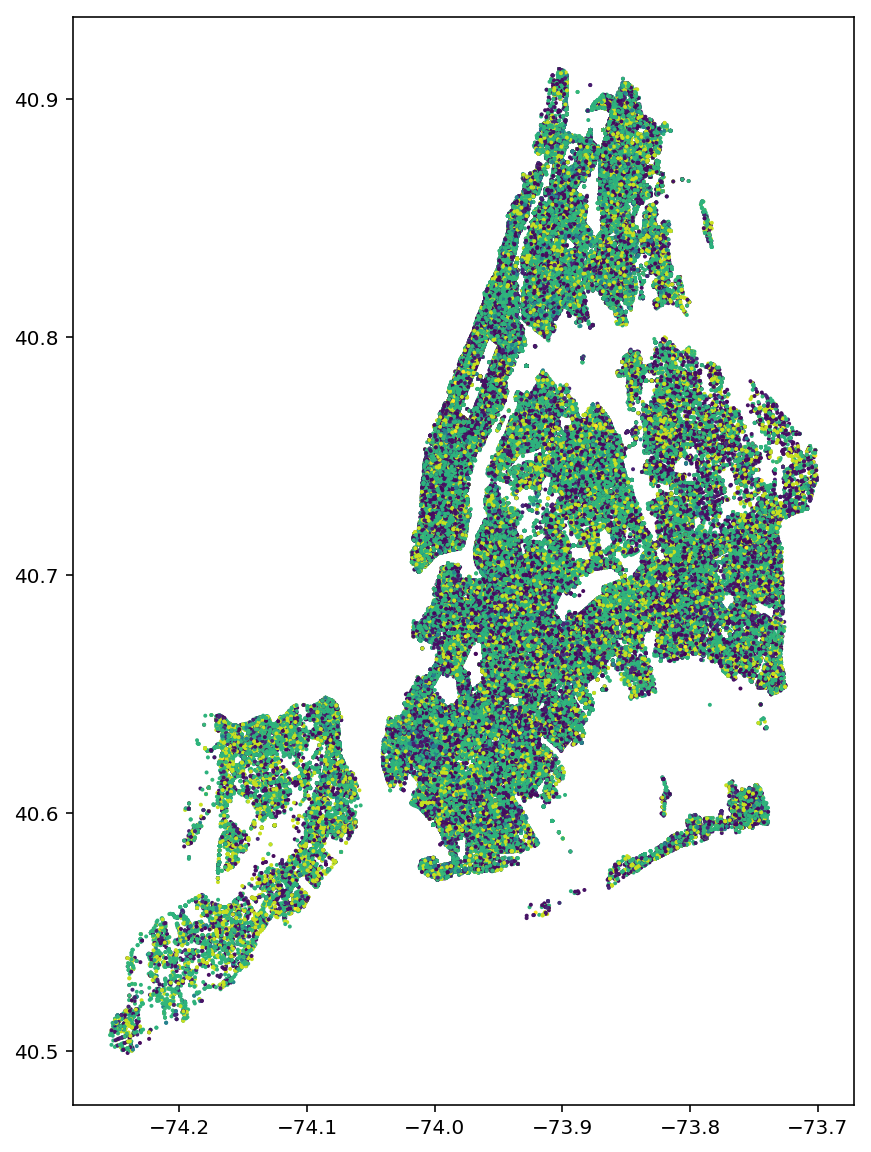

In [183]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr18].Longitude, nypd[cr18].Latitude, s=1, c=np.log(nypd[cr18].KY_CD))

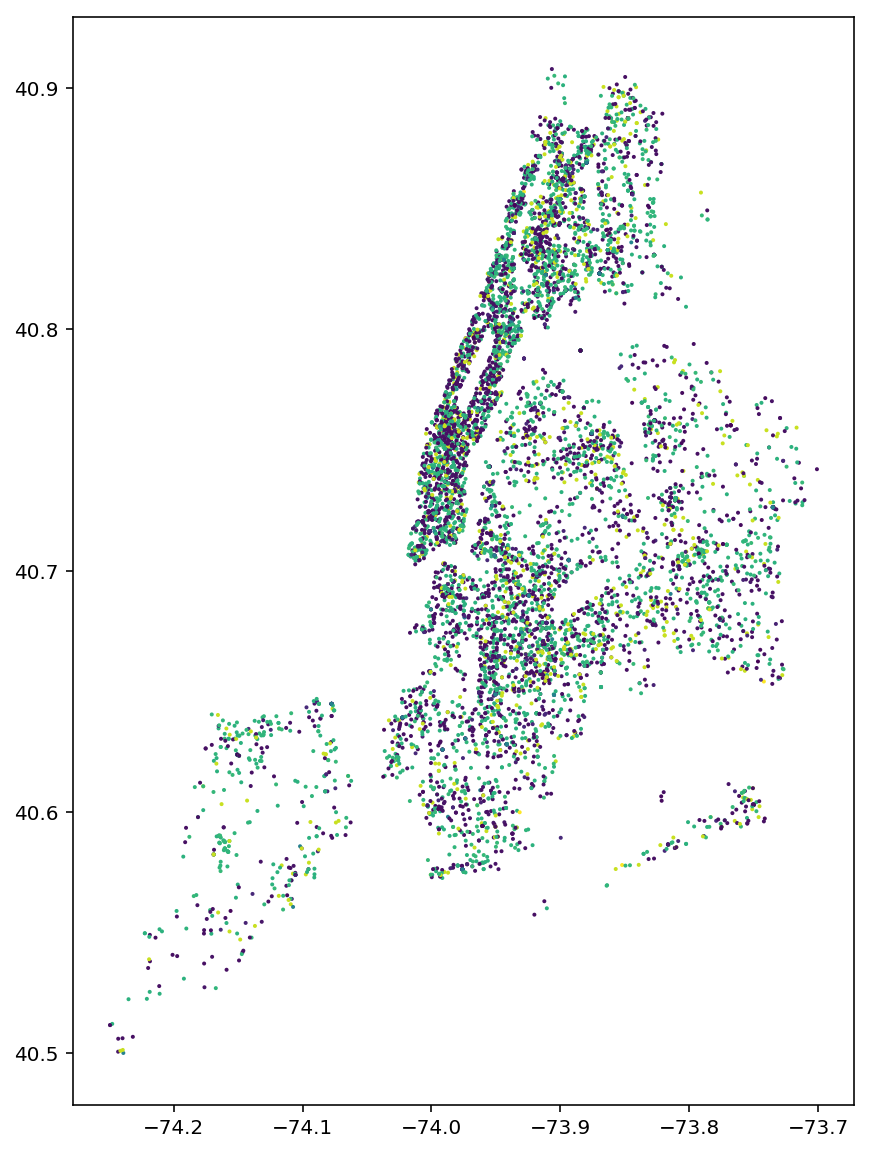

In [179]:
plt.figure(figsize = (7,10))
plt.scatter(nypd[cr17].Longitude, nypd[cr17].Latitude, s=1, c=np.log(nypd[cr17].KY_CD))

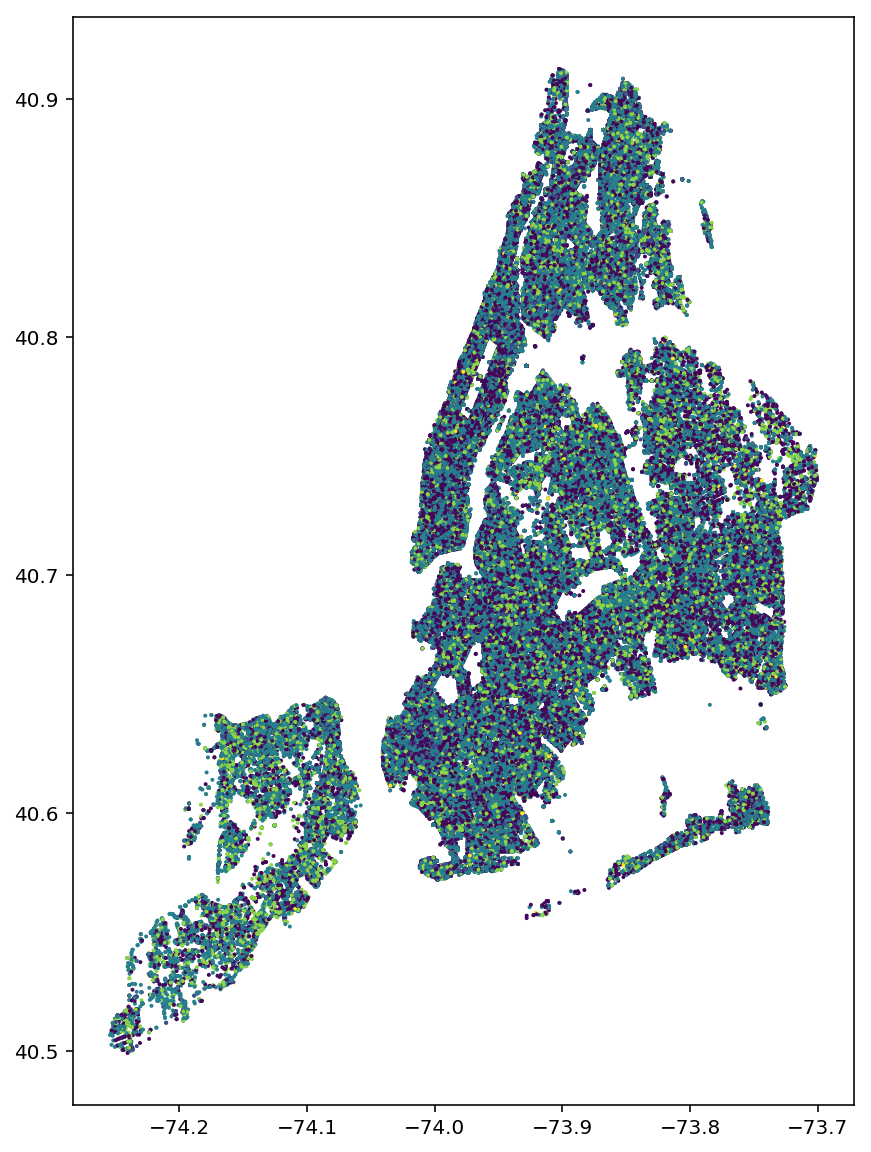

In [27]:
plt.figure(figsize = (7,10))
plt.scatter(nypd.Longitude, nypd.Latitude, s=1, c=(nypd.KY_CD))

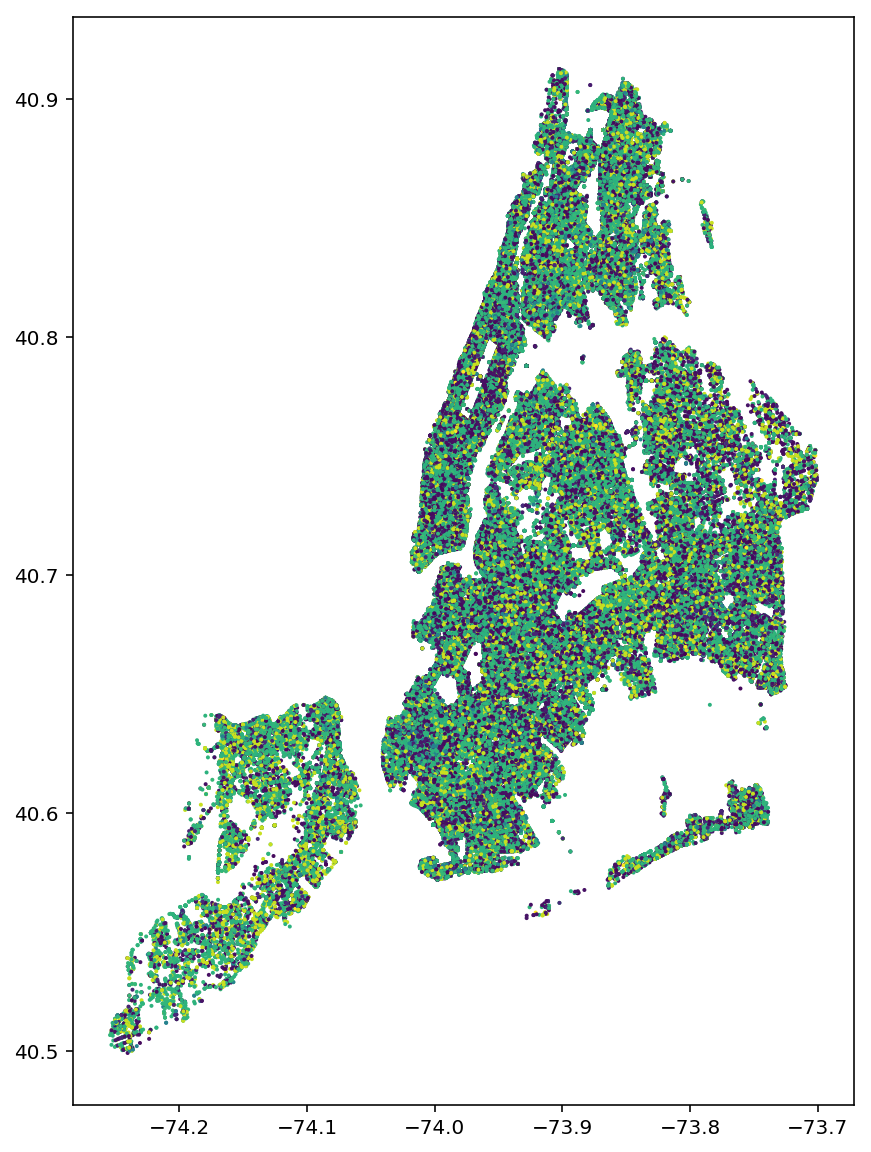

In [28]:
plt.figure(figsize = (7,10))
plt.scatter(nypd.Longitude, nypd.Latitude, s=1, c=np.log(nypd.KY_CD))